<a href="https://colab.research.google.com/github/oyinloluwa20/Deep-Learning/blob/computer-vision-basic/computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* `torchvision` -> Base domain library for pytorch.
* `torchvision.datasets` -> Get dataset and data loading functions for computer vision.
* `torchvision.models` -> Get pretrained model for computer vision applications.
* `torchvision.transforms` -> functions for manipulating computer vision models(images).
* `torch.utils.data.Dataset` -> Base dataset class for pytorch.
*  `torch.utils.data.DataLoader` ->

In [1]:
#Import PyTorvh
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#check version
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


## 1.1 Getting a dataset
Using data from fashion mist.
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html


In [2]:
train_data =datasets.FashionMNIST(
    root="data",
    train =True,
    download =True,
    transform =torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data =datasets.FashionMNIST(
    root="data",
    train =False,
    download =True,
    transform =torchvision.transforms.ToTensor(),
    target_transform=None
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(test_data)

10000

In [4]:
len(train_data)

60000

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.1 Check input and output shapes of data

In [9]:
#check the shape of our image
print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


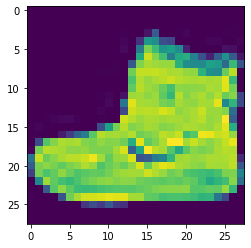

In [10]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())


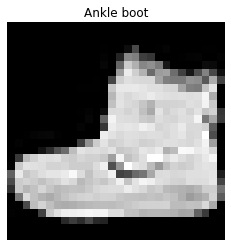

In [11]:
from pickle import FALSE
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

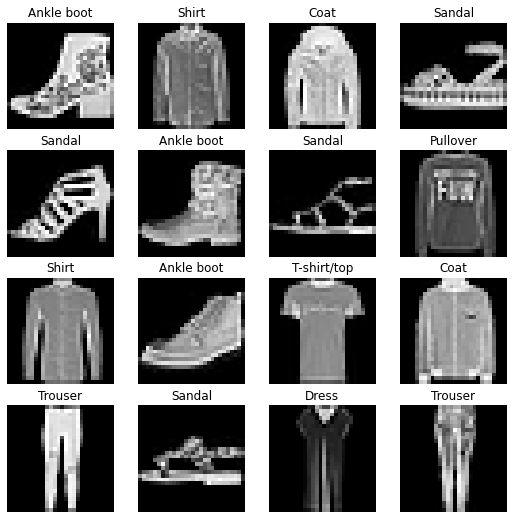

In [12]:
#plot more images
torch.manual_seed(42)
fig =plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range (1, rows*cols+1):
  random_idx =torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)
  


In [16]:
from torch.utils import data
# Dataloader turns our dataset into a python iterable.
# Turn our image into batches
# storing images in batches is computationally efficient,as the computer loads multiple images at once.
# batch storage also gives our neural netork more changes to update its gradients per epoch 
from torch.utils.data import DataLoader 
BATCH_SIZE =32
# Turn datasets into iterables(batches)

train_dataloader = DataLoader(dataset =train_data,
                              batch_size=BATCH_SIZE,
                              shuffle =True)

test_dataloader = DataLoader(dataset =test_data,
                              batch_size=BATCH_SIZE,
                              shuffle =False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f04cef10850>,
 <torch.utils.data.dataloader.DataLoader at 0x7f04cef10b90>)

In [20]:
print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader:{len(train_dataloader)} of batches: {BATCH_SIZE}")
print(f"Length of test_dataloader:{len(test_dataloader)} of batches: {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f04cef10850>, <torch.utils.data.dataloader.DataLoader object at 0x7f04cef10b90>)
Length of train_dataloader:1875 of batches: 32
Length of test_dataloader:313 of batches: 32


In [21]:
# check out what's inside the training dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


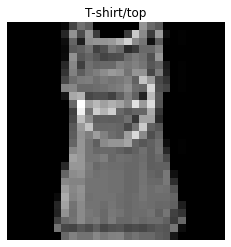

In [24]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")